In [904]:
import pandas as pd
import numpy as np
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import mean_squared_error
from sklearn.metrics import accuracy_score
from math import sqrt

<p style="font-family: Arial; font-size:1.75em;color:purple; font-style:bold"><br>

Creating a Pandas DataFrame from a CSV file<br></p>


In [905]:
data = pd.read_csv('/home/ahsan/Documents/house-price/train.csv')
test = pd.read_csv('/home/ahsan/Documents/house-price/test.csv')

In [906]:
data.head(5)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [907]:
data.shape

(1460, 81)

In [908]:
type(data)

pandas.core.frame.DataFrame

In [909]:
data.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

In [910]:
data.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


<p style="font-family: Arial; font-size:2.75em;color:purple; font-style:bold"><br>

Separation Data<br></p>

<p style="font-family: Arial; font-size:1.75em;color:purple; font-style:bold"><br>

Numeric Data <br></p>

In [911]:
# only store numeric data in features
data1 = data._get_numeric_data()
data1.head(5)

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
0,1,60,65.0,8450,7,5,2003,2003,196.0,706,...,0,61,0,0,0,0,0,2,2008,208500
1,2,20,80.0,9600,6,8,1976,1976,0.0,978,...,298,0,0,0,0,0,0,5,2007,181500
2,3,60,68.0,11250,7,5,2001,2002,162.0,486,...,0,42,0,0,0,0,0,9,2008,223500
3,4,70,60.0,9550,7,5,1915,1970,0.0,216,...,0,35,272,0,0,0,0,2,2006,140000
4,5,60,84.0,14260,8,5,2000,2000,350.0,655,...,192,84,0,0,0,0,0,12,2008,250000


In [912]:
data1.columns

Index(['Id', 'MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual',
       'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd',
       'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF',
       'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea',
       'MiscVal', 'MoSold', 'YrSold', 'SalePrice'],
      dtype='object')

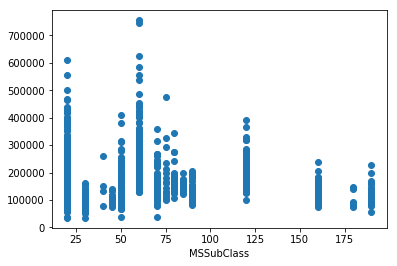

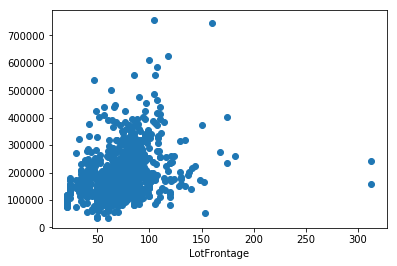

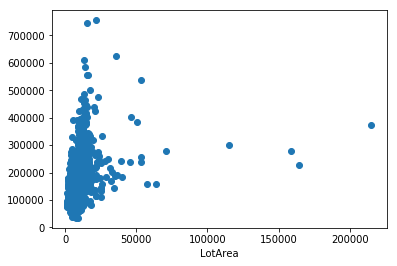

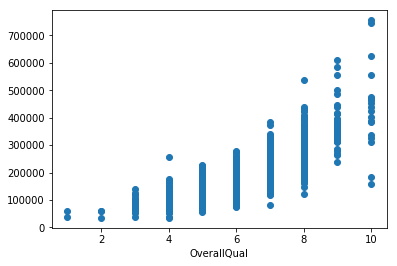

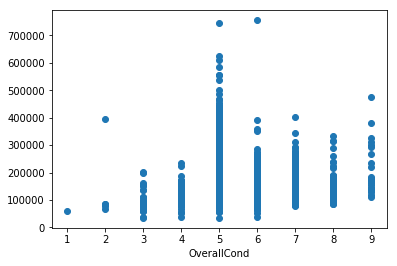

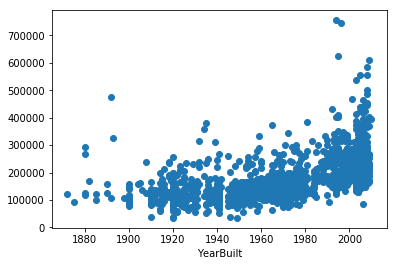

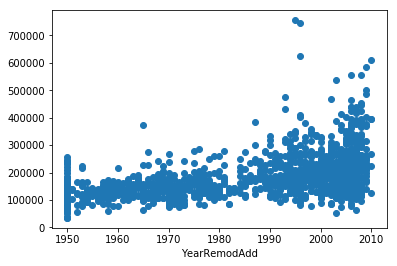

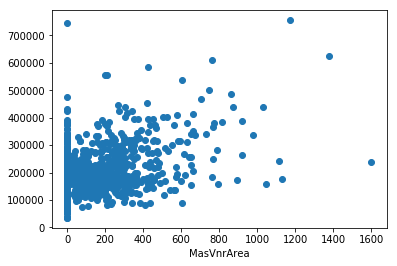

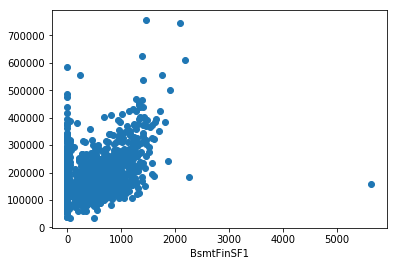

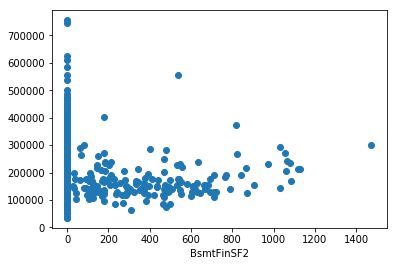

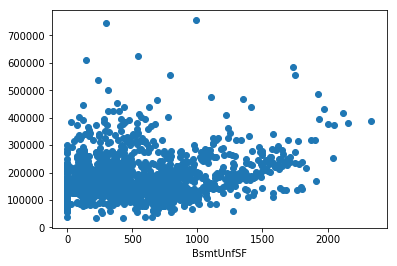

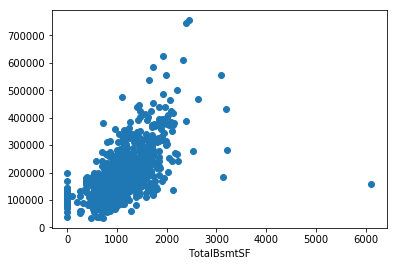

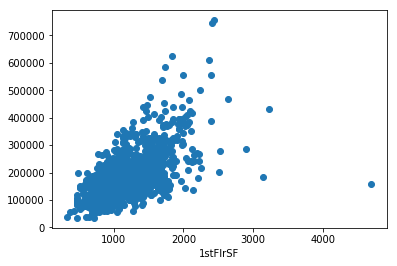

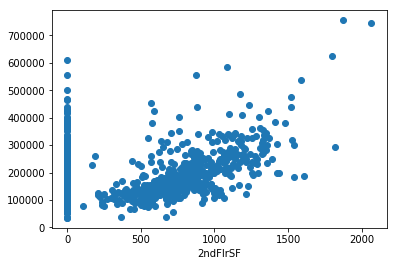

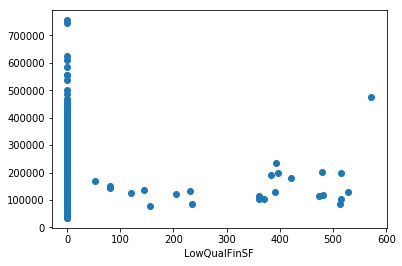

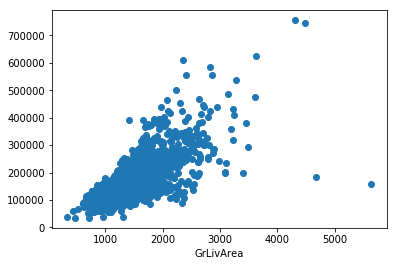

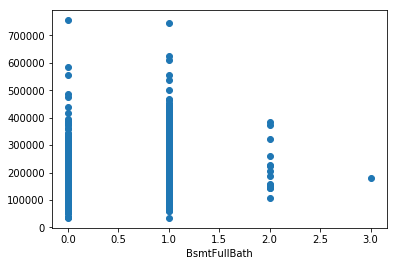

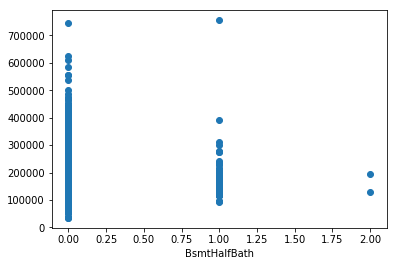

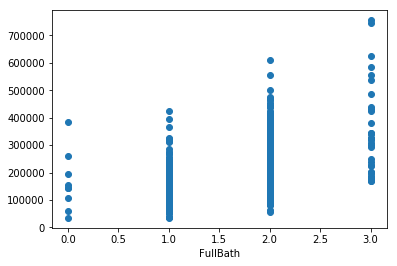

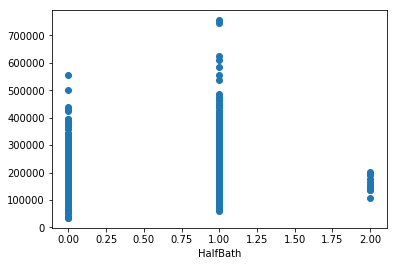

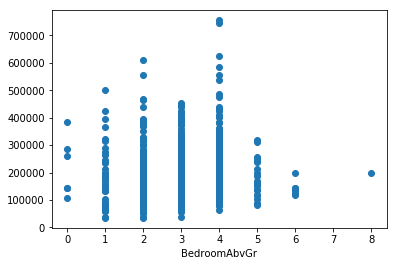

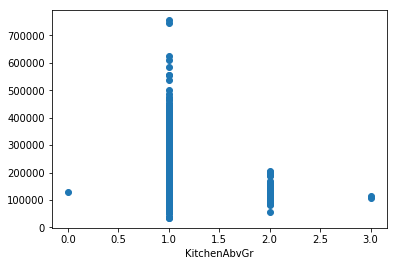

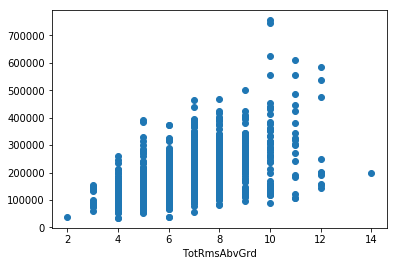

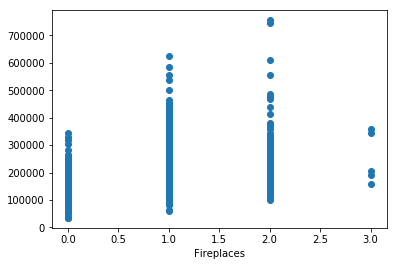

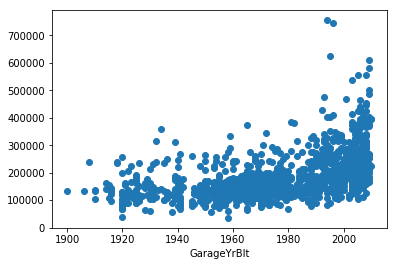

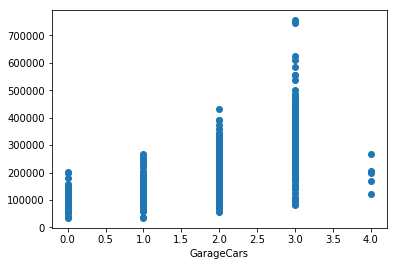

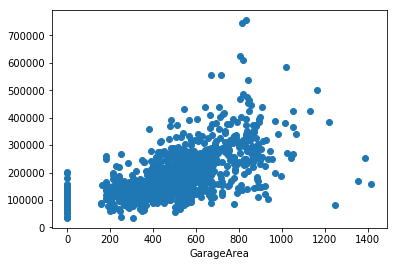

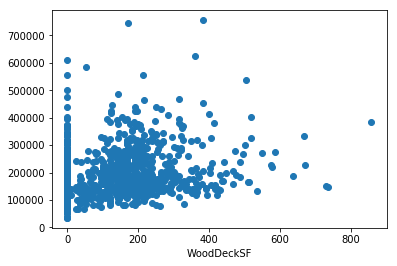

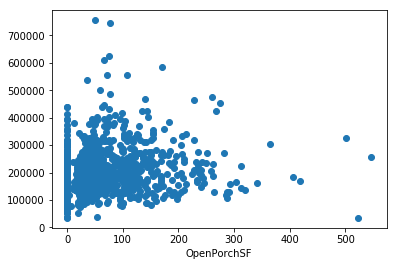

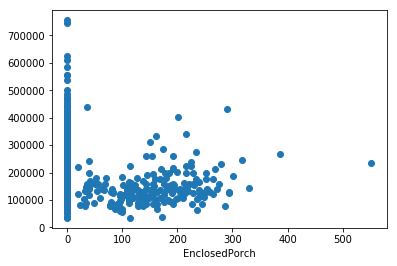

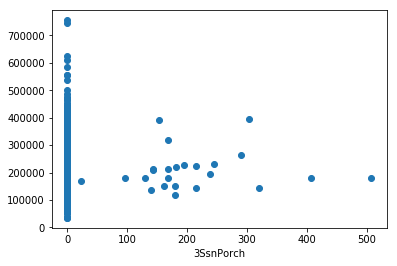

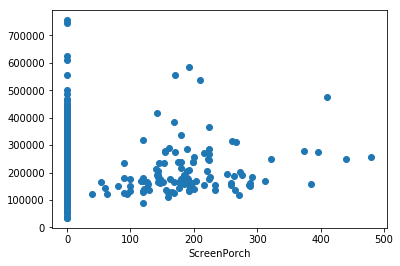

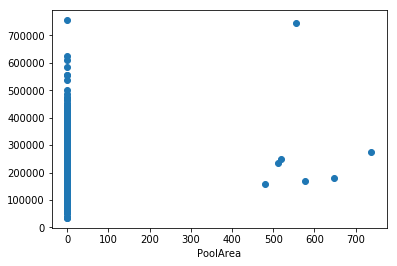

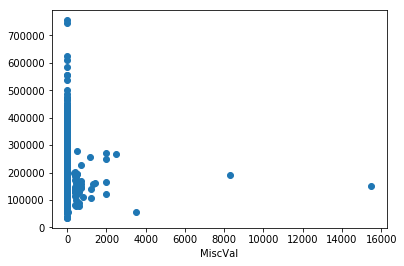

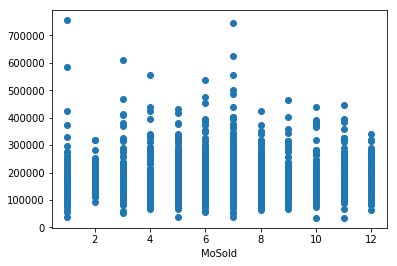

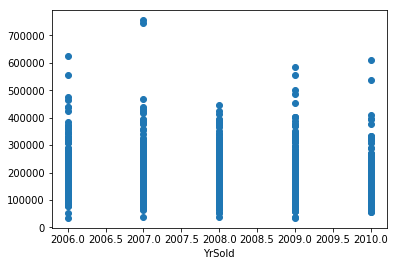

In [913]:
import matplotlib.pyplot as plt
for X in ['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual',
       'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd',
       'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF',
       'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea',
       'MiscVal', 'MoSold', 'YrSold']:
    Z=data1[X]
    Y = data1["SalePrice"]
    plt.xlabel(X)
    plt.scatter(Z,Y)
    plt.show()

In [914]:
type(data1)

pandas.core.frame.DataFrame

In [915]:
data1.shape

(1460, 38)

In [916]:
data1.isnull().sum(axis=0)

Id                 0
MSSubClass         0
LotFrontage      259
LotArea            0
OverallQual        0
OverallCond        0
YearBuilt          0
YearRemodAdd       0
MasVnrArea         8
BsmtFinSF1         0
BsmtFinSF2         0
BsmtUnfSF          0
TotalBsmtSF        0
1stFlrSF           0
2ndFlrSF           0
LowQualFinSF       0
GrLivArea          0
BsmtFullBath       0
BsmtHalfBath       0
FullBath           0
HalfBath           0
BedroomAbvGr       0
KitchenAbvGr       0
TotRmsAbvGrd       0
Fireplaces         0
GarageYrBlt       81
GarageCars         0
GarageArea         0
WoodDeckSF         0
OpenPorchSF        0
EnclosedPorch      0
3SsnPorch          0
ScreenPorch        0
PoolArea           0
MiscVal            0
MoSold             0
YrSold             0
SalePrice          0
dtype: int64

In [917]:
data1.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Id,1460.0,730.500000,421.610009,1.0,365.75,730.5,1095.25,1460.0
MSSubClass,1460.0,56.897260,42.300571,20.0,20.00,50.0,70.00,190.0
LotFrontage,1201.0,70.049958,24.284752,21.0,59.00,69.0,80.00,313.0
LotArea,1460.0,10516.828082,9981.264932,1300.0,7553.50,9478.5,11601.50,215245.0
OverallQual,1460.0,6.099315,1.382997,1.0,5.00,6.0,7.00,10.0
OverallCond,1460.0,5.575342,1.112799,1.0,5.00,5.0,6.00,9.0
YearBuilt,1460.0,1971.267808,30.202904,1872.0,1954.00,1973.0,2000.00,2010.0
YearRemodAdd,1460.0,1984.865753,20.645407,1950.0,1967.00,1994.0,2004.00,2010.0
MasVnrArea,1452.0,103.685262,181.066207,0.0,0.00,0.0,166.00,1600.0
BsmtFinSF1,1460.0,443.639726,456.098091,0.0,0.00,383.5,712.25,5644.0


In [918]:
data1["LotFrontage"] = data1["LotFrontage"].fillna(70.049958)

In [919]:
data1["MasVnrArea"] = data1["MasVnrArea"].fillna(103.685262)

In [920]:
data1["GarageYrBlt"] = data1["GarageYrBlt"].fillna(1978.506164)

In [921]:
data1.isnull().any()

Id               False
MSSubClass       False
LotFrontage      False
LotArea          False
OverallQual      False
OverallCond      False
YearBuilt        False
YearRemodAdd     False
MasVnrArea       False
BsmtFinSF1       False
BsmtFinSF2       False
BsmtUnfSF        False
TotalBsmtSF      False
1stFlrSF         False
2ndFlrSF         False
LowQualFinSF     False
GrLivArea        False
BsmtFullBath     False
BsmtHalfBath     False
FullBath         False
HalfBath         False
BedroomAbvGr     False
KitchenAbvGr     False
TotRmsAbvGrd     False
Fireplaces       False
GarageYrBlt      False
GarageCars       False
GarageArea       False
WoodDeckSF       False
OpenPorchSF      False
EnclosedPorch    False
3SsnPorch        False
ScreenPorch      False
PoolArea         False
MiscVal          False
MoSold           False
YrSold           False
SalePrice        False
dtype: bool

<p style="font-family: Arial; font-size:1.75em;color:purple; font-style:bold"><br>

Nominal Data <br></p>

In [922]:
# limit to categorical data using df.select_dtypes()
data2 = data.select_dtypes(include=[object])

data2.head(3)

,MSZoning,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,...,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,PoolQC,Fence,MiscFeature,SaleType,SaleCondition
0,RL,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,...,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal
1,RL,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,...,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal
2,RL,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,...,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal


In [923]:
data2.columns

Index(['MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities',
       'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
       'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation',
       'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual',
       'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual',
       'GarageCond', 'PavedDrive', 'PoolQC', 'Fence', 'MiscFeature',
       'SaleType', 'SaleCondition'],
      dtype='object')

In [924]:
data2.shape

(1460, 43)

In [925]:
data2.isnull().any()

MSZoning         False
Street           False
Alley             True
LotShape         False
LandContour      False
Utilities        False
LotConfig        False
LandSlope        False
Neighborhood     False
Condition1       False
Condition2       False
BldgType         False
HouseStyle       False
RoofStyle        False
RoofMatl         False
Exterior1st      False
Exterior2nd      False
MasVnrType        True
ExterQual        False
ExterCond        False
Foundation       False
BsmtQual          True
BsmtCond          True
BsmtExposure      True
BsmtFinType1      True
BsmtFinType2      True
Heating          False
HeatingQC        False
CentralAir       False
Electrical        True
KitchenQual      False
Functional       False
FireplaceQu       True
GarageType        True
GarageFinish      True
GarageQual        True
GarageCond        True
PavedDrive       False
PoolQC            True
Fence             True
MiscFeature       True
SaleType         False
SaleCondition    False
dtype: bool

In [926]:
data2.describe(include=['O']).transpose()

,count,unique,top,freq
MSZoning,1460,5,RL,1151
Street,1460,2,Pave,1454
Alley,91,2,Grvl,50
LotShape,1460,4,Reg,925
LandContour,1460,4,Lvl,1311
Utilities,1460,2,AllPub,1459
LotConfig,1460,5,Inside,1052
LandSlope,1460,3,Gtl,1382
Neighborhood,1460,25,NAmes,225
Condition1,1460,9,Norm,1260


In [927]:
data2 = data2.fillna("None")

In [928]:
data2.isnull().any()

MSZoning         False
Street           False
Alley            False
LotShape         False
LandContour      False
Utilities        False
LotConfig        False
LandSlope        False
Neighborhood     False
Condition1       False
Condition2       False
BldgType         False
HouseStyle       False
RoofStyle        False
RoofMatl         False
Exterior1st      False
Exterior2nd      False
MasVnrType       False
ExterQual        False
ExterCond        False
Foundation       False
BsmtQual         False
BsmtCond         False
BsmtExposure     False
BsmtFinType1     False
BsmtFinType2     False
Heating          False
HeatingQC        False
CentralAir       False
Electrical       False
KitchenQual      False
Functional       False
FireplaceQu      False
GarageType       False
GarageFinish     False
GarageQual       False
GarageCond       False
PavedDrive       False
PoolQC           False
Fence            False
MiscFeature      False
SaleType         False
SaleCondition    False
dtype: bool

In [929]:
# TODO: create a LabelEncoder object and fit it to each feature in X


# 1. INSTANTIATE
# encode labels with value between 0 and n_classes-1.
le = preprocessing.LabelEncoder()


# 2/3. FIT AND TRANSFORM
# use df.apply() to apply le.fit_transform to all columns
data_2 = data2.apply(le.fit_transform)
data_2.tail()

,MSZoning,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,...,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,PoolQC,Fence,MiscFeature,SaleType,SaleCondition
1455,3,1,1,3,3,0,4,0,8,2,...,1,2,5,5,2,3,4,1,8,4
1456,3,1,1,3,3,0,4,0,14,2,...,1,3,5,5,2,3,2,1,8,4
1457,3,1,1,3,3,0,4,0,6,2,...,1,2,5,5,2,3,0,3,8,4
1458,3,1,1,3,3,0,4,0,12,2,...,1,3,5,5,2,3,4,1,8,4
1459,3,1,1,3,3,0,4,0,7,2,...,1,0,5,5,2,3,4,1,8,4


In [930]:
data=pd.concat([data1, data_2], axis=1)

In [931]:
data.shape

(1460, 81)

In [932]:
data.columns

Index(['Id', 'MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual',
       'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd',
       'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF',
       'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea',
       'MiscVal', 'MoSold', 'YrSold', 'SalePrice', 'MSZoning', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd',
       'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Heating',
       'HeatingQC', 'CentralAir

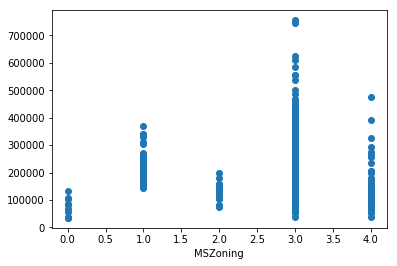

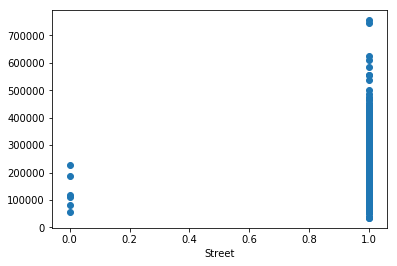

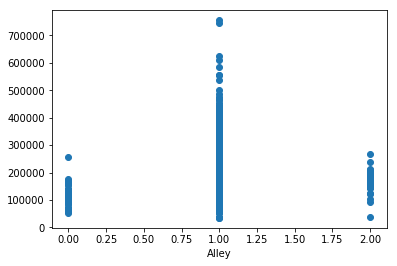

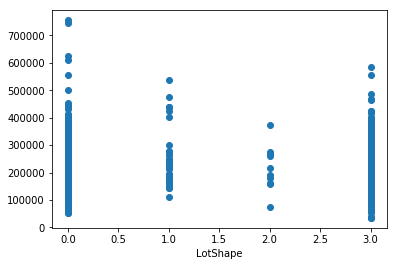

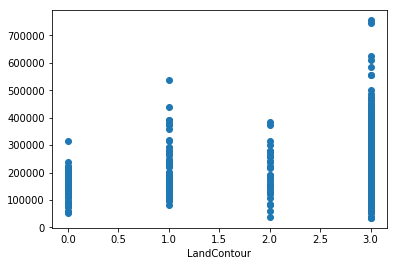

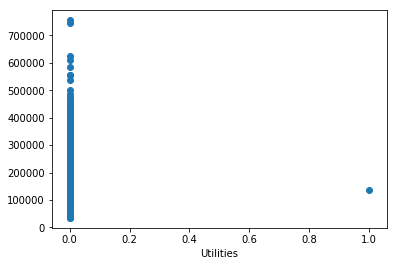

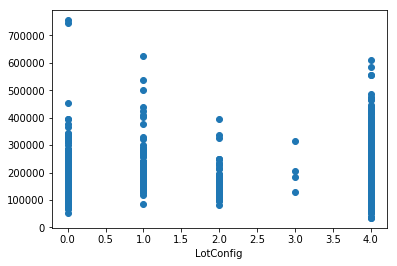

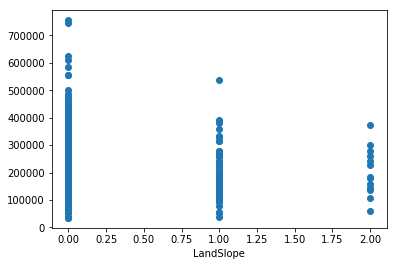

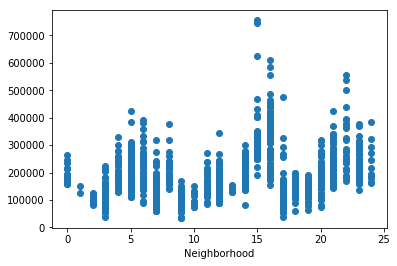

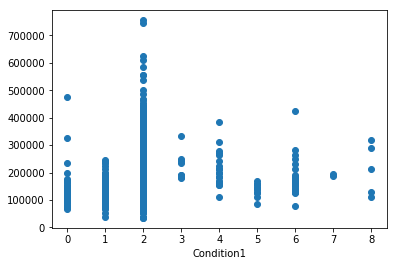

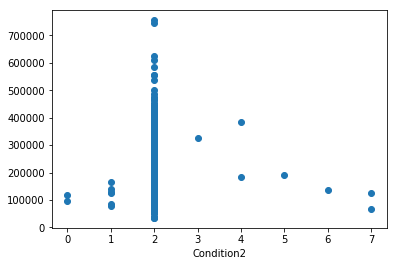

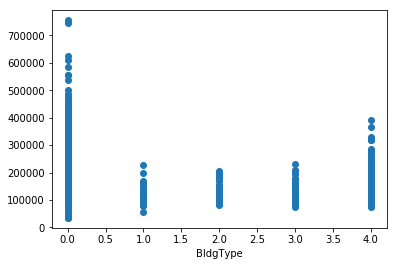

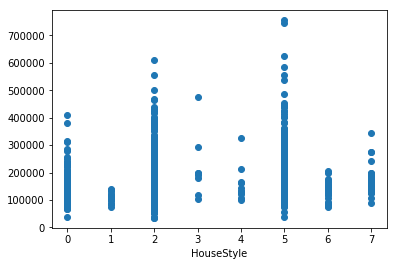

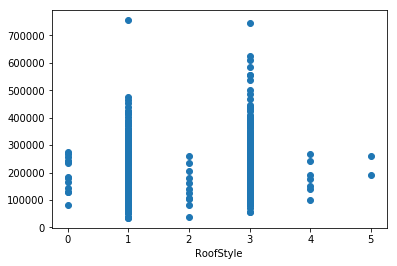

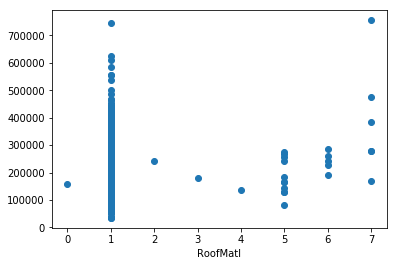

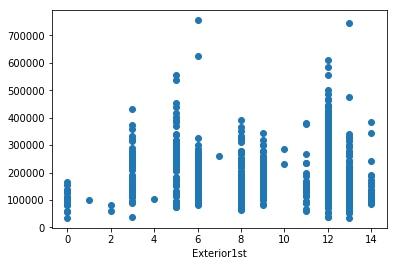

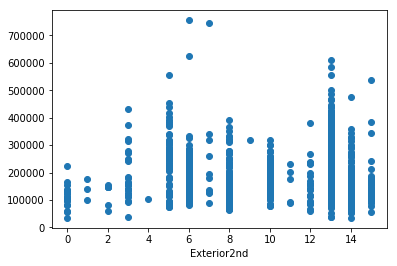

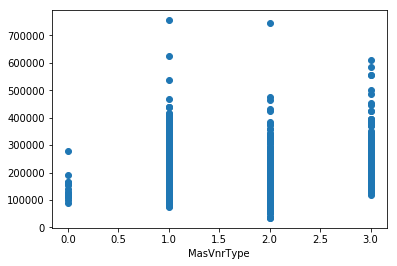

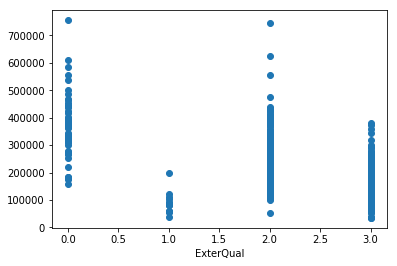

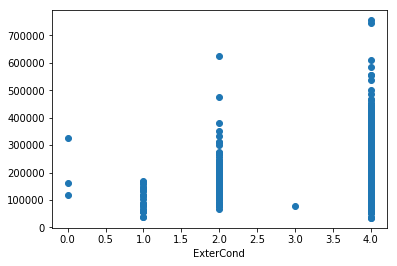

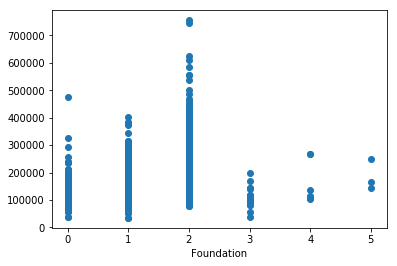

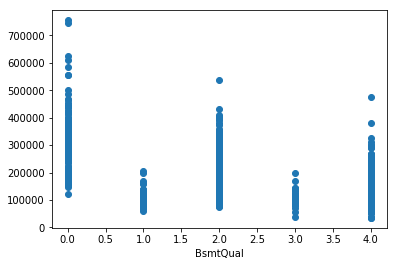

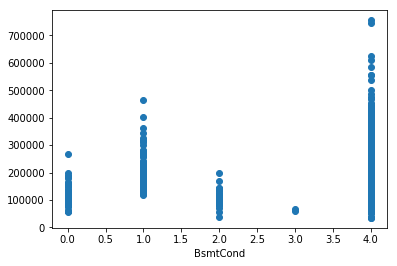

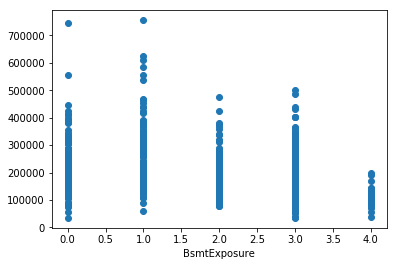

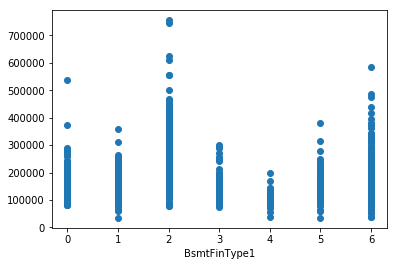

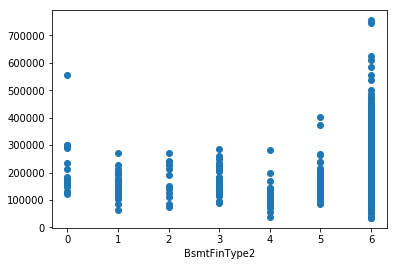

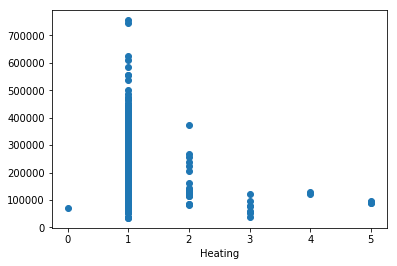

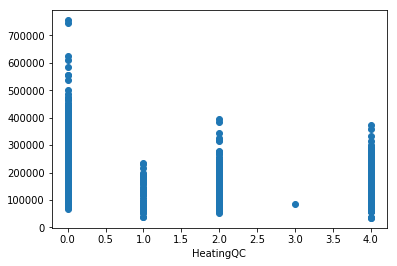

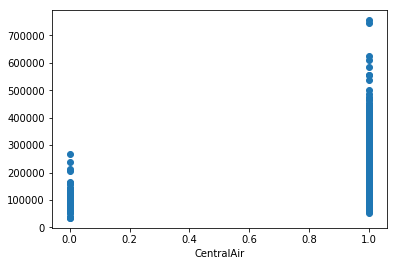

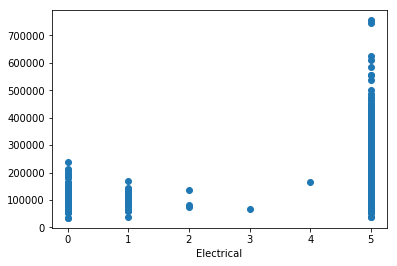

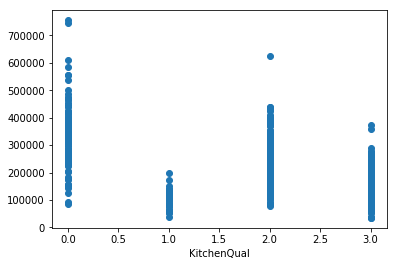

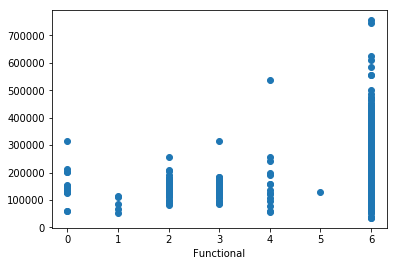

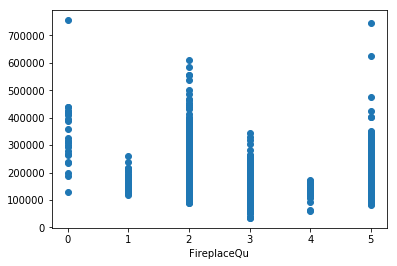

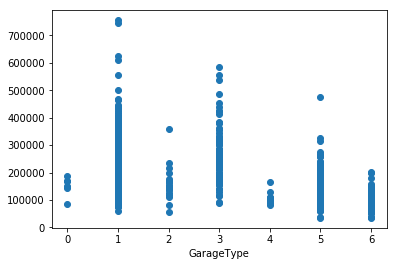

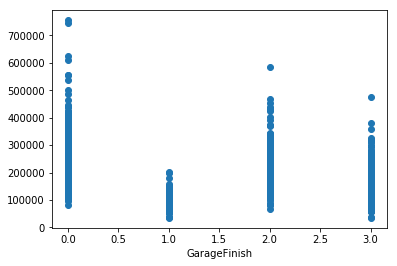

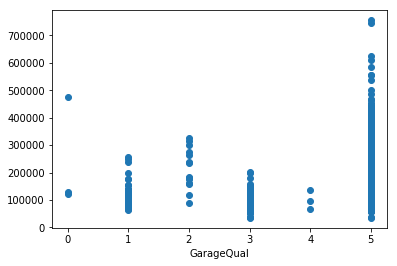

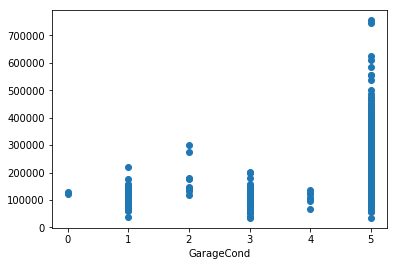

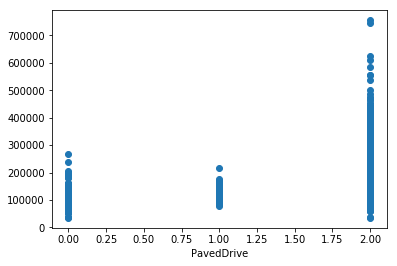

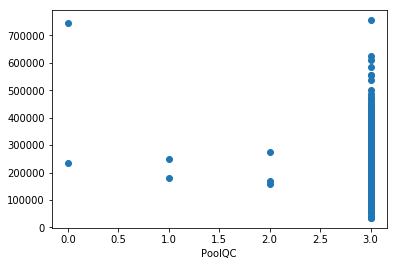

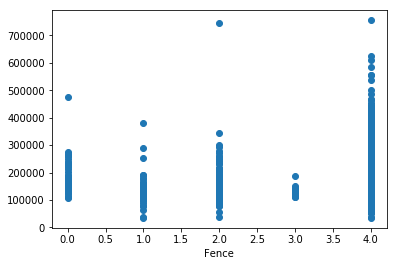

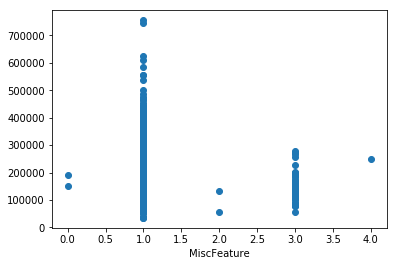

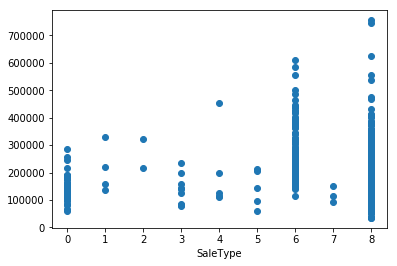

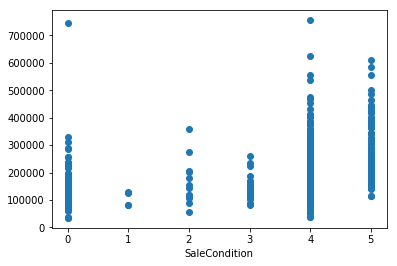

In [933]:
import matplotlib.pyplot as plt
for X in [ 'MSZoning', 'Street','Alley', 'LotShape', 'LandContour', 'Utilities',
       'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
       'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation',
       'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual',
       'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual',
       'GarageCond', 'PavedDrive', 'PoolQC', 'Fence', 'MiscFeature',
       'SaleType', 'SaleCondition']:
    Z=data[X]
    Y = data["SalePrice"]
    plt.xlabel(X)
    plt.scatter(Z,Y)
    plt.show()

In [934]:
FeatureNominal=[ 'MSZoning', 'Street','Alley', 'LotShape', 'LandContour', 'Utilities',
       'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
       'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation',
       'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual',
       'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual',
       'GarageCond', 'PavedDrive', 'PoolQC', 'Fence', 'MiscFeature',
       'SaleType', 'SaleCondition']

In [935]:
for f in FeatureNominal:
    related = data1['SalePrice'].corr(data[f])
    print("%s: %f" % (f,related))

MSZoning: -0.166872
Street: 0.041036
Alley: 0.083121
LotShape: -0.255580
LandContour: 0.015453
Utilities: -0.014314
LotConfig: -0.067396
LandSlope: 0.051152
Neighborhood: 0.210851
Condition1: 0.091155
Condition2: 0.007513
BldgType: -0.085591
HouseStyle: 0.180163
RoofStyle: 0.222405
RoofMatl: 0.132383
Exterior1st: 0.103551
Exterior2nd: 0.103766
MasVnrType: 0.018216
ExterQual: -0.636884
ExterCond: 0.117303
Foundation: 0.382479
BsmtQual: -0.593734
BsmtCond: 0.091503
BsmtExposure: -0.309043
BsmtFinType1: -0.098734
BsmtFinType2: 0.072717
Heating: -0.098812
HeatingQC: -0.400178
CentralAir: 0.251328
Electrical: 0.237044
KitchenQual: -0.589189
Functional: 0.115328
FireplaceQu: -0.097176
GarageType: -0.415283
GarageFinish: -0.425684
GarageQual: 0.205963
GarageCond: 0.246705
PavedDrive: 0.231357
PoolQC: -0.126070
Fence: 0.140640
MiscFeature: -0.066316
SaleType: -0.054911
SaleCondition: 0.213092


In [936]:
Features= ['OverallQual','YearBuilt','YearRemodAdd','1stFlrSF','GrLivArea',
'FullBath','TotRmsAbvGrd','GarageYrBlt','GarageCars','GarageArea']

In [937]:
#Features=['LotArea', 'OverallQual', 'YearBuilt', 'TotRmsAbvGrd']


In [938]:
target = ['SalePrice']

In [939]:
from sklearn.preprocessing import StandardScaler

# Separating out the features
x = data.loc[:, Features].values
# Separating out the target
y = data.loc[:,target].values
# Standardizing the features
x = StandardScaler().fit_transform(x)

In [940]:
from sklearn.decomposition import PCA
pca = PCA(n_components=4)
principalComponents = pca.fit_transform(x)
principalDf = pd.DataFrame(data = principalComponents
             , columns = ['component 1', 'component 2','component 3','component 4'])

In [941]:
finalData = pd.concat([principalDf, data[target]], axis = 1)

In [942]:
finalData 

,component 1,component 2,component 3,component 4,SalePrice
0,1.757652,-0.664011,-1.049789,-0.939149,208500
1,0.049127,-0.126271,0.179434,-0.008659,181500
2,1.564073,-1.107485,-0.529070,-0.587923,223500
3,0.273150,0.630952,1.582156,-1.238862,140000
4,3.506554,0.273207,0.297979,-1.195449,250000
5,-0.552251,-1.684304,0.296283,-0.455901,143000
6,2.633680,-0.531306,-0.162772,1.014649,307000
7,0.794869,0.928886,-0.217298,-0.469219,200000
8,-0.608815,2.587439,0.419427,-0.999882,129900
9,-3.311026,0.747951,0.475633,0.504222,118000


<p style="font-family: Arial; font-size:3.75em;color:purple; font-style:bold"><br>

Prediction <br></p>

In [943]:
feat=['component 1', 'component 2','component 3','component 4']
X = finalData[feat]
X

,component 1,component 2,component 3,component 4
0,1.757652,-0.664011,-1.049789,-0.939149
1,0.049127,-0.126271,0.179434,-0.008659
2,1.564073,-1.107485,-0.529070,-0.587923
3,0.273150,0.630952,1.582156,-1.238862
4,3.506554,0.273207,0.297979,-1.195449
5,-0.552251,-1.684304,0.296283,-0.455901
6,2.633680,-0.531306,-0.162772,1.014649
7,0.794869,0.928886,-0.217298,-0.469219
8,-0.608815,2.587439,0.419427,-0.999882
9,-3.311026,0.747951,0.475633,0.504222


In [944]:
y = finalData[target]

In [945]:
y.head()

,SalePrice
0,208500
1,181500
2,223500
3,140000
4,250000


In [946]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=324)

<p style="font-family: Arial; font-size:1.75em;color:purple; font-style:bold"><br>

(1) Linear Regression: Fit a model to the training set
<br><br></p>


In [947]:
regressorl = LinearRegression()
regressorl.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

<p style="font-family: Arial; font-size:1.75em;color:purple; font-style:bold"><br>

Perform Prediction using Linear Regression Model
<br><br></p>


In [948]:
y_prediction = regressorl.predict(X_test)
y_prediction

array([[ 88488.985271  ],
       [206535.70459064],
       [161460.24105276],
       [105407.82880416],
       [247851.01755283],
       [215733.11099016],
       [153918.08178953],
       [208626.10379943],
       [226285.83499031],
       [148232.56213378],
       [130364.86178402],
       [110815.22897223],
       [ 75912.31597383],
       [377106.53014557],
       [255666.73350205],
       [250298.01068837],
       [211592.70192759],
       [126296.01320897],
       [124444.21572637],
       [189573.97515618],
       [198054.87806534],
       [217409.62990271],
       [316220.93007403],
       [146846.00331492],
       [182444.56142692],
       [269691.82496689],
       [104337.21526358],
       [154205.17597187],
       [158029.03309193],
       [201541.35432893],
       [ 94707.29316433],
       [139291.97354954],
       [200707.5878327 ],
       [ 92962.35021456],
       [144772.02796525],
       [156482.27250398],
       [232662.66738408],
       [187695.34670414],
       [2984

<p style="font-family: Arial; font-size:1.75em;color:purple; font-style:bold"><br>

Evaluate Linear Regression Accuracy using Root Mean Square Error

<br><br></p>


In [949]:
RMSE = sqrt(mean_squared_error(y_true = y_test, y_pred = y_prediction))

In [950]:
print(RMSE)

39239.02826302546


<p style="font-family: Arial; font-size:1.75em;color:purple; font-style:bold"><br>

(2) Decision Tree Regressor: Fit a new regression model to the training set
<br><br></p>

In [951]:
regressor = DecisionTreeRegressor(max_depth=5)
regressor.fit(X_train, y_train)

DecisionTreeRegressor(criterion='mse', max_depth=5, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=None, splitter='best')

<p style="font-family: Arial; font-size:1.75em;color:purple; font-style:bold"><br>

Perform Prediction using Decision Tree Regressor
<br><br></p>


In [952]:
y_prediction = regressor.predict(X_test)
y_prediction

array([122458.94642857, 183914.62937063, 143452.87640449, 122458.94642857,
       242001.91304348, 169707.6407767 , 163855.        , 169707.6407767 ,
       209581.98181818, 130627.96116505, 143452.87640449, 130627.96116505,
        96653.33333333, 538325.16666667, 242001.91304348, 242001.91304348,
       242001.91304348, 130627.96116505, 130627.96116505, 169707.6407767 ,
       183914.62937063, 183914.62937063, 412080.41666667, 143452.87640449,
       169707.6407767 , 242001.91304348, 130627.96116505, 163855.        ,
       143452.87640449, 183914.62937063, 101286.23333333, 149676.38888889,
       183914.62937063, 122458.94642857, 143452.87640449, 143452.87640449,
       209581.98181818, 169707.6407767 , 371915.        , 130627.96116505,
       169707.6407767 , 183914.62937063, 122458.94642857,  96653.33333333,
       169707.6407767 , 101286.23333333, 209581.98181818,  96653.33333333,
       130627.96116505, 183914.62937063, 169707.6407767 , 143452.87640449,
       143452.87640449, 1

<p style="font-family: Arial; font-size:1.75em;color:purple; font-style:bold"><br>

Evaluate Decision Tree Regression Accuracy using Root Mean Square Error

<br><br></p>

In [953]:
RMSE = sqrt(mean_squared_error(y_true = y_test, y_pred = y_prediction))

In [954]:
print(RMSE)

43521.27043714905


In [955]:
#accuracy_score(y_true = y_test, y_pred = y_prediction)

# # RandomForestClassifier

In [956]:
clf = RandomForestClassifier(max_depth=5, random_state=0)
clf.fit(X_train, y_train)

/home/ahsan/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=5, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=0, verbose=0, warm_start=False)

In [957]:
predictions = clf.predict(X_test)

In [958]:
accuracy_score(y_true = y_test, y_pred = predictions)

0.022821576763485476

# AdaBoostClassifier

In [959]:
clfb = AdaBoostClassifier(n_estimators=100)
clfb.fit(X_train, y_train)

/home/ahsan/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


AdaBoostClassifier(algorithm='SAMME.R', base_estimator=None,
          learning_rate=1.0, n_estimators=100, random_state=None)

In [960]:
predictionsb = clfb.predict(X_test)

<p style="font-family: Arial; font-size:1.75em;color:purple; font-style:bold"><br>

Test <br></p>

In [961]:
test.shape

(1459, 80)

<p style="font-family: Arial; font-size:2.75em;color:purple; font-style:bold"><br>

Separation Data<br></p>

<p style="font-family: Arial; font-size:1.75em;color:purple; font-style:bold"><br>

Numeric Data <br></p>

In [962]:
# only store numeric data in features
test1 = test._get_numeric_data()
test1.head(5)

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold
0,1461,20,80.0,11622,5,6,1961,1961,0.0,468.0,...,730.0,140,0,0,0,120,0,0,6,2010
1,1462,20,81.0,14267,6,6,1958,1958,108.0,923.0,...,312.0,393,36,0,0,0,0,12500,6,2010
2,1463,60,74.0,13830,5,5,1997,1998,0.0,791.0,...,482.0,212,34,0,0,0,0,0,3,2010
3,1464,60,78.0,9978,6,6,1998,1998,20.0,602.0,...,470.0,360,36,0,0,0,0,0,6,2010
4,1465,120,43.0,5005,8,5,1992,1992,0.0,263.0,...,506.0,0,82,0,0,144,0,0,1,2010


In [963]:
test1.columns

Index(['Id', 'MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual',
       'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd',
       'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF',
       'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea',
       'MiscVal', 'MoSold', 'YrSold'],
      dtype='object')

In [964]:
type(test1)

pandas.core.frame.DataFrame

In [965]:
test1.shape

(1459, 37)

In [966]:
test1.isnull().sum(axis=0)

Id                 0
MSSubClass         0
LotFrontage      227
LotArea            0
OverallQual        0
OverallCond        0
YearBuilt          0
YearRemodAdd       0
MasVnrArea        15
BsmtFinSF1         1
BsmtFinSF2         1
BsmtUnfSF          1
TotalBsmtSF        1
1stFlrSF           0
2ndFlrSF           0
LowQualFinSF       0
GrLivArea          0
BsmtFullBath       2
BsmtHalfBath       2
FullBath           0
HalfBath           0
BedroomAbvGr       0
KitchenAbvGr       0
TotRmsAbvGrd       0
Fireplaces         0
GarageYrBlt       78
GarageCars         1
GarageArea         1
WoodDeckSF         0
OpenPorchSF        0
EnclosedPorch      0
3SsnPorch          0
ScreenPorch        0
PoolArea           0
MiscVal            0
MoSold             0
YrSold             0
dtype: int64

In [967]:
test1.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Id,1459.0,2190.000000,421.321334,1461.0,1825.50,2190.0,2554.50,2919.0
MSSubClass,1459.0,57.378341,42.746880,20.0,20.00,50.0,70.00,190.0
LotFrontage,1232.0,68.580357,22.376841,21.0,58.00,67.0,80.00,200.0
LotArea,1459.0,9819.161069,4955.517327,1470.0,7391.00,9399.0,11517.50,56600.0
OverallQual,1459.0,6.078821,1.436812,1.0,5.00,6.0,7.00,10.0
OverallCond,1459.0,5.553804,1.113740,1.0,5.00,5.0,6.00,9.0
YearBuilt,1459.0,1971.357779,30.390071,1879.0,1953.00,1973.0,2001.00,2010.0
YearRemodAdd,1459.0,1983.662783,21.130467,1950.0,1963.00,1992.0,2004.00,2010.0
MasVnrArea,1444.0,100.709141,177.625900,0.0,0.00,0.0,164.00,1290.0
BsmtFinSF1,1458.0,439.203704,455.268042,0.0,0.00,350.5,753.50,4010.0


In [968]:
test1["LotFrontage"] = test1["LotFrontage"].fillna(68.580357)

In [969]:
test1["BsmtFinSF1"] = test1["BsmtFinSF1"].fillna(439.203704)
test1["BsmtFinSF2"] = test1["BsmtFinSF2"].fillna(52.619342)
test1["BsmtUnfSF"] = test1["BsmtUnfSF"].fillna(554.294925)
test1["TotalBsmtSF"] = test1["TotalBsmtSF"].fillna(1046.117970)
 

In [970]:
test1["MasVnrArea"] = test1["MasVnrArea"].fillna(103.685262)

In [971]:
test1["BsmtFullBath"] = test1["BsmtFullBath"].fillna(0.434454)
test1["BsmtHalfBath"] = test1["BsmtHalfBath"].fillna(0.065202)


In [972]:
test1["GarageYrBlt"] = test1["GarageYrBlt"].fillna(1978.506164)

In [973]:
test1["GarageCars"] = test1["GarageCars"].fillna(1.766118)
test1["GarageArea"] = test1["GarageArea"].fillna(472.768861)

In [974]:
test1.isnull().any()

Id               False
MSSubClass       False
LotFrontage      False
LotArea          False
OverallQual      False
OverallCond      False
YearBuilt        False
YearRemodAdd     False
MasVnrArea       False
BsmtFinSF1       False
BsmtFinSF2       False
BsmtUnfSF        False
TotalBsmtSF      False
1stFlrSF         False
2ndFlrSF         False
LowQualFinSF     False
GrLivArea        False
BsmtFullBath     False
BsmtHalfBath     False
FullBath         False
HalfBath         False
BedroomAbvGr     False
KitchenAbvGr     False
TotRmsAbvGrd     False
Fireplaces       False
GarageYrBlt      False
GarageCars       False
GarageArea       False
WoodDeckSF       False
OpenPorchSF      False
EnclosedPorch    False
3SsnPorch        False
ScreenPorch      False
PoolArea         False
MiscVal          False
MoSold           False
YrSold           False
dtype: bool

<p style="font-family: Arial; font-size:1.75em;color:purple; font-style:bold"><br>

Nominal Data <br></p>

In [975]:
# limit to categorical data using df.select_dtypes()
test2 = test.select_dtypes(include=[object])

test2.head(3)

,MSZoning,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,...,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,PoolQC,Fence,MiscFeature,SaleType,SaleCondition
0,RH,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Feedr,...,Attchd,Unf,TA,TA,Y,NaN,MnPrv,NaN,WD,Normal
1,RL,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,NAmes,Norm,...,Attchd,Unf,TA,TA,Y,NaN,NaN,Gar2,WD,Normal
2,RL,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,...,Attchd,Fin,TA,TA,Y,NaN,MnPrv,NaN,WD,Normal


In [976]:
test2.columns

Index(['MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities',
       'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
       'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation',
       'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual',
       'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual',
       'GarageCond', 'PavedDrive', 'PoolQC', 'Fence', 'MiscFeature',
       'SaleType', 'SaleCondition'],
      dtype='object')

In [977]:
test2.shape

(1459, 43)

In [978]:
test2.isnull().any()

MSZoning          True
Street           False
Alley             True
LotShape         False
LandContour      False
Utilities         True
LotConfig        False
LandSlope        False
Neighborhood     False
Condition1       False
Condition2       False
BldgType         False
HouseStyle       False
RoofStyle        False
RoofMatl         False
Exterior1st       True
Exterior2nd       True
MasVnrType        True
ExterQual        False
ExterCond        False
Foundation       False
BsmtQual          True
BsmtCond          True
BsmtExposure      True
BsmtFinType1      True
BsmtFinType2      True
Heating          False
HeatingQC        False
CentralAir       False
Electrical       False
KitchenQual       True
Functional        True
FireplaceQu       True
GarageType        True
GarageFinish      True
GarageQual        True
GarageCond        True
PavedDrive       False
PoolQC            True
Fence             True
MiscFeature       True
SaleType          True
SaleCondition    False
dtype: bool

In [979]:
test2.describe(include=['O']).transpose()

,count,unique,top,freq
MSZoning,1455,5,RL,1114
Street,1459,2,Pave,1453
Alley,107,2,Grvl,70
LotShape,1459,4,Reg,934
LandContour,1459,4,Lvl,1311
Utilities,1457,1,AllPub,1457
LotConfig,1459,5,Inside,1081
LandSlope,1459,3,Gtl,1396
Neighborhood,1459,25,NAmes,218
Condition1,1459,9,Norm,1251


In [980]:
 test2=test2.fillna("None")

In [981]:
test2.isnull().any()

MSZoning         False
Street           False
Alley            False
LotShape         False
LandContour      False
Utilities        False
LotConfig        False
LandSlope        False
Neighborhood     False
Condition1       False
Condition2       False
BldgType         False
HouseStyle       False
RoofStyle        False
RoofMatl         False
Exterior1st      False
Exterior2nd      False
MasVnrType       False
ExterQual        False
ExterCond        False
Foundation       False
BsmtQual         False
BsmtCond         False
BsmtExposure     False
BsmtFinType1     False
BsmtFinType2     False
Heating          False
HeatingQC        False
CentralAir       False
Electrical       False
KitchenQual      False
Functional       False
FireplaceQu      False
GarageType       False
GarageFinish     False
GarageQual       False
GarageCond       False
PavedDrive       False
PoolQC           False
Fence            False
MiscFeature      False
SaleType         False
SaleCondition    False
dtype: bool

In [982]:
# TODO: create a LabelEncoder object and fit it to each feature in X


# 1. INSTANTIATE
# encode labels with value between 0 and n_classes-1.
le = preprocessing.LabelEncoder()


# 2/3. FIT AND TRANSFORM
# use df.apply() to apply le.fit_transform to all columns
test_2 = test2.apply(le.fit_transform)
test_2.head()

,MSZoning,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,...,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,PoolQC,Fence,MiscFeature,SaleType,SaleCondition
0,3,1,1,3,3,0,4,0,12,1,...,1,3,4,5,2,2,2,1,9,4
1,4,1,1,0,3,0,0,0,12,2,...,1,3,4,5,2,2,4,0,9,4
2,4,1,1,0,3,0,4,0,8,2,...,1,0,4,5,2,2,2,1,9,4
3,4,1,1,0,3,0,4,0,8,2,...,1,0,4,5,2,2,4,1,9,4
4,4,1,1,0,1,0,4,0,22,2,...,1,2,4,5,2,2,4,1,9,4


In [983]:
test=pd.concat([test1, test_2], axis=1)

In [984]:
test.shape

(1459, 80)

In [985]:
test.columns

Index(['Id', 'MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual',
       'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd',
       'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF',
       'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea',
       'MiscVal', 'MoSold', 'YrSold', 'MSZoning', 'Street', 'Alley',
       'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope',
       'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond',
       'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Heating', 'HeatingQC',
       'CentralAir', 'Electrica

In [986]:
# Separating out the features
x1 = test.loc[:, Features].values
# Separating out the target
x1 = StandardScaler().fit_transform(x1)

In [987]:
pca = PCA(n_components=4)
principalComponents = pca.fit_transform(x1)
principaltest = pd.DataFrame(data = principalComponents
             , columns = ['component 1', 'component 2','component 3','component 4'])

In [988]:
feat=['component 1', 'component 2','component 3','component 4']
T = principaltest[feat]


# Prediction Test

In [989]:
#predictionsT = regressorl.predict(T)

In [990]:
#predictionsT = clf.predict(T)

In [991]:
predictionsT = regressor.predict(T)

In [992]:
predictionsT= pd.DataFrame(predictionsT, columns=['SalePrice']).to_csv('/home/ahsan/Documents/house-price/result28.csv')

In [993]:
numeric =[ 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive', 'WoodDeckSF', 'OpenPorchSF',
       'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'PoolQC',
       'Fence', 'MiscFeature', 'MiscVal', 'MoSold', 'YrSold', 'SaleType',
       'SaleCondition', 'SalePrice']

In [994]:
nominal=['MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities',
       'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
       'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation',
       'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual',
       'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual',
       'GarageCond', 'PavedDrive', 'PoolQC', 'Fence', 'MiscFeature',
       'SaleType', 'SaleCondition']

# check how the features are correlated with the overall ratings

for f in numeric:
    related = data['SalePrice'].corr(data[f])
    print("%s: %f" % (f,related))

In [995]:
# check how the features are correlated with the overall ratings

for f in Features:
    related = data1['SalePrice'].corr(data1[f])
    print("%s: %f" % (f,related))

OverallQual: 0.790982
YearBuilt: 0.522897
YearRemodAdd: 0.507101
1stFlrSF: 0.605852
GrLivArea: 0.708624
FullBath: 0.560664
TotRmsAbvGrd: 0.533723
GarageYrBlt: 0.470177
GarageCars: 0.640409
GarageArea: 0.623431


In [996]:
potentialFeatures=['OverallQual','YearBuilt','YearRemodAdd','1stFlrSF','GrLivArea',
'FullBath','TotRmsAbvGrd','GarageYrBlt','GarageCars','GarageArea']
